<a href="https://colab.research.google.com/github/jain-sarthak007/project_02/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
!pip install streamlit
import streamlit as st
st.title('Medical Insurance Cost Prediction')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-05 11:47:03.812 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/medical_insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(2772, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

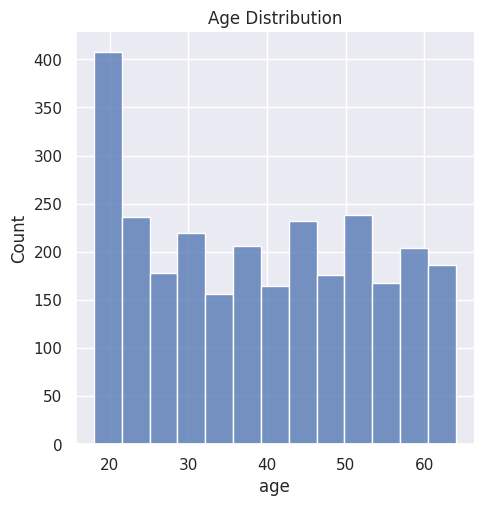

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

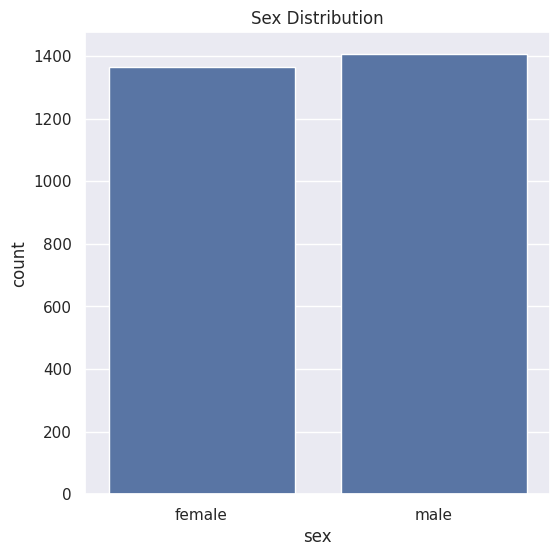

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,1406
female,1366


<Figure size 600x600 with 0 Axes>

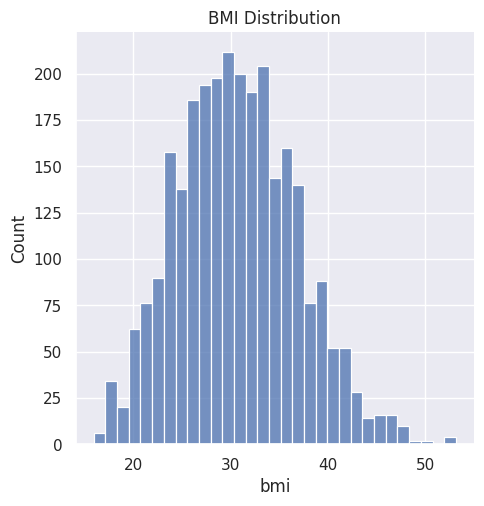

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

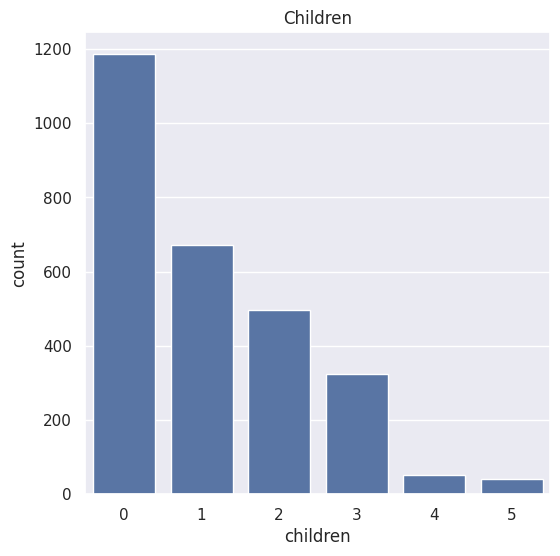

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


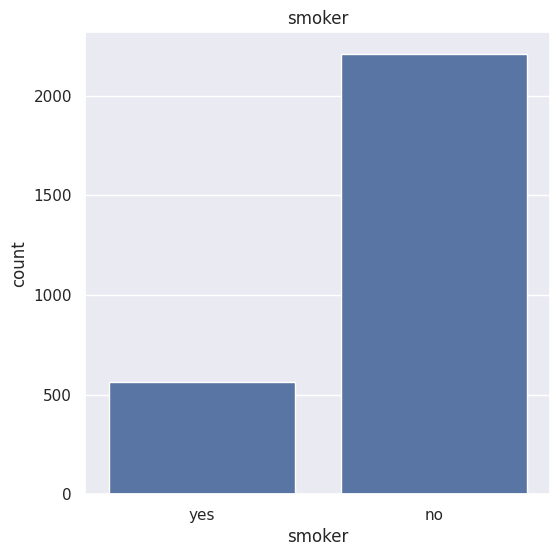

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


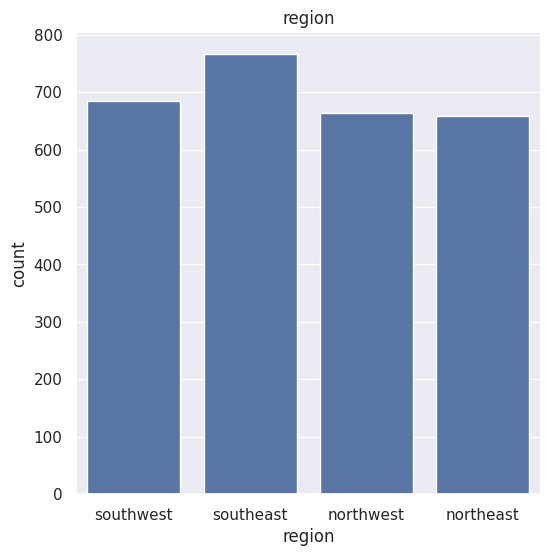

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


<Figure size 600x600 with 0 Axes>

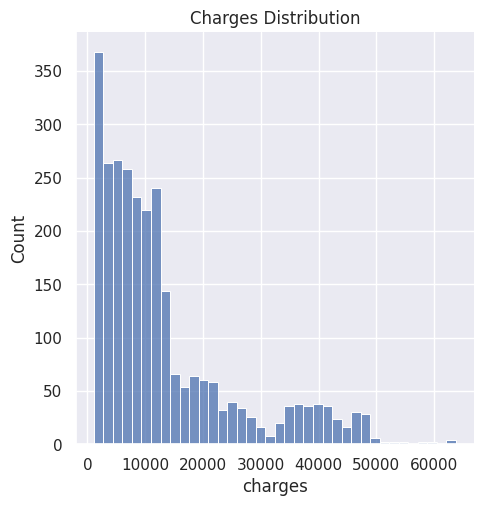

In [40]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2079, 6) (693, 6)


Model Training

Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.754033366262729


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7398782467495058


In [53]:
def get_input():
    try:
        x = int(input("Enter age: "))
        if x < 18:
            print("Age should be 18 or above")
            return False
        else:
            print("Age is valid")

        y = int(input("Enter gender (male-0, female-1): "))
        if y not in [0, 1]:
            print("Gender should be either 0 (male) or 1 (female)")
            return False

        z = float(input("Enter BMI: "))
        if z == 0:
            print("BMI cannot be zero")
            return False

        n = int(input("Enter the number of children: "))

        s = int(input("Enter smoker status (smoker-0, non-smoker-1): "))
        if s not in [0, 1]:
            print("Smoker status should be either 0 (smoker) or 1 (non-smoker)")
            return False

        r = int(input("Enter region (southeast:0, southwest:1, northeast:2, northwest:3): "))
        if r not in [0, 1, 2, 3]:
            print("Region should be either 0, 1, 2, or 3")
            return False

        return (x, y, z, n, s, r)

    except ValueError:
        print("Invalid input. Please enter the correct data type.")
        return False

input_data = None
while not input_data:
    input_data = get_input()
    if input_data:
        print("All inputs are valid.")
        print("Input data:", input_data)
    else:
        print("Invalid input. Please try again.")


Enter age: 19
Age is valid
Enter gender (male-0, female-1): 1
Enter BMI: 3
Enter the number of children: 1
Enter smoker status (smoker-0, non-smoker-1): 0
Enter region (southeast:0, southwest:1, northeast:2, northwest:3): 0
All inputs are valid.
Input data: (19, 1, 3.0, 1, 0, 0)


Building a Predictive System

In [55]:
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is $', prediction[0])

[17754.78032225]
The insurance cost is $ 17754.780322253504


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
